Analysing flight prices using factors that affect it in positive and negative ways.


## Context -

customers have been expressing their concern over the difference of  flight prices that keep changing day to day.

## The Analysis -

1) Importing libraries and understanding the dataset :

In [1]:
# importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset using pandas

flight = pd.read_excel('flight_data.xlsx')

In [3]:
# the dataset to be used

flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
#shape of dataset-

flight.shape

(10683, 11)

Inference-

The dataset we have

rows - 10683

columns - 11

In [5]:
# information regarding dataset-

flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Inference-

The dataset has datatype: 

1 columns integer type

10 columns object type

In [6]:
# separating day,month and year from date for better understanding-

flight['date'] = flight['Date_of_Journey'].replace('/',' ',regex=True)
flight[['day','month','year']] = flight['date'].str.split(expand=True)
flight.drop('date',axis=1,inplace=True)
flight[['day','month','year']] = flight[['day','month','year']].astype(int)

In [7]:
# converting duration of hours into minutes-

flight[['k','m']] = flight['Duration'].str.split(expand=True)
flight[['k','m']] = flight[['k','m']].replace('h','',regex=True)
flight[['k','m']] = flight[['k','m']].replace('m','',regex=True)
flight['m'] =flight.m.astype('str').replace('None',0)
flight[['k','m']] = flight[['k','m']].astype(int)
flight['Duration_in_minutes'] = flight['k']*60 + flight['m']
flight.drop(['k','m'],axis=1,inplace=True)

In [8]:
flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Duration_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019,150
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019,180
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019,160


In [9]:
#describing numerical columns-

flight.describe()

,Price,day,month,year,Duration_in_minutes
count,10683.000000,10683.000000,10683.000000,10683.0,10683.000000
mean,9087.064121,13.508378,4.708602,2019.0,643.120846
std,4611.359167,8.479277,1.164357,0.0,507.835322
min,1759.000000,1.000000,3.000000,2019.0,75.000000
25%,5277.000000,6.000000,3.000000,2019.0,170.000000
50%,8372.000000,12.000000,5.000000,2019.0,520.000000
75%,12373.000000,21.000000,6.000000,2019.0,930.000000
max,79512.000000,27.000000,6.000000,2019.0,2860.000000


Inference

price,day,month,year,duration in minutes are the only numerical column with mean,min and max.

In [10]:
flight['Price'].quantile(0.85)

13817.0

In [11]:
flight['Price'].quantile(0.99)

22270.0

In [12]:
# to specify the outliers

flight[flight.Price > 23000 ]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Duration_in_minutes
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430,1,3,2019,1215
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983,1,3,2019,385
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890,1,3,2019,380
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890,1,3,2019,325
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139,6,3,2019,1775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210,6,3,2019,1260
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209,1,3,2019,280
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890,1,3,2019,1325
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825,1,3,2019,860


In [13]:
flight.drop(flight[flight.Price >= 23000 ].index,inplace=True)

Inference-

Dropping these outleirs beacuse majority of the passengers aren't looking for high priced flight tickets but somewhere less than 20000 rupee, as we can see most of passengers have travelled for less than 22000 rupees.

In [14]:
flight['Duration_in_minutes'].quantile(0.85)

1319.7499999999945

In [15]:
flight['Duration_in_minutes'].quantile(0.99)

1900.0

In [16]:
# to specify the outliers

flight[flight.Duration_in_minutes > 1900 ]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,Duration_in_minutes
226,Jet Airways,3/03/2019,Delhi,Cochin,DEL → IDR → BOM → COK,05:25,18:50 04 Mar,37h 25m,2 stops,No info,18799,3,3,2019,2245
470,Jet Airways,21/03/2019,Delhi,Cochin,DEL → UDR → BOM → COK,18:20,04:25 23 Mar,34h 5m,2 stops,No info,13082,21,3,2019,2045
553,Air India,9/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,05:00,19:15 10 Mar,38h 15m,2 stops,No info,10598,9,3,2019,2295
919,Air India,12/05/2019,Kolkata,Banglore,CCU → BBI → IXR → DEL → BLR,12:00,23:15 13 May,35h 15m,3 stops,No info,10991,12,5,2019,2115
925,Jet Airways,6/03/2019,Delhi,Cochin,DEL → DED → BOM → COK,16:50,04:25 08 Mar,35h 35m,2 stops,No info,19907,6,3,2019,2135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10020,Air India,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,05:00,19:15 10 May,38h 15m,2 stops,No info,9653,9,5,2019,2295
10326,Air India,03/03/2019,Banglore,New Delhi,BLR → CCU → GAU → DEL,05:50,22:10 07 Mar,40h 20m,2 stops,No info,11791,3,3,2019,2420
10333,Air India,15/05/2019,Kolkata,Banglore,CCU → BOM → HBX → BLR,09:25,17:20 16 May,31h 55m,2 stops,No info,13616,15,5,2019,1915
10456,Jet Airways,6/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,19:10,18:50 08 Mar,47h 40m,2 stops,No info,20694,6,3,2019,2860


In [17]:
# dropping the outliers

flight.drop(flight[flight.Duration_in_minutes > 1900 ].index,inplace=True)

Inference-

we are dropping duration greater than 1900 -

majority of the passengers prefer to travel in lesser duration and flights also don't travel high duration because of fuel refilling , people who travel for large duration have more stops to refuel the flights, but these are rare cases.  

In [18]:
# reindexing the columns for better understanding-

flight = flight.reindex(columns = ['Airline','Date_of_Journey','day', 'month', 'year','Source', 'Destination', 'Route','Dep_Time', 'Arrival_Time', 'Duration_in_minutes', 'Total_Stops','Additional_Info', 'Price','Date_of_Journey','Duration'])

# 2) Cleaning the dataset :


### a) Checking null values if present-

In [19]:
# the null values present in the dataset-

flight.isna().sum()

Airline                0
Date_of_Journey        0
day                    0
month                  0
year                   0
Source                 0
Destination            0
Route                  1
Dep_Time               0
Arrival_Time           0
Duration_in_minutes    0
Total_Stops            1
Additional_Info        0
Price                  0
Date_of_Journey        0
Duration               0
dtype: int64

Inference-

There is 1 null value in route and Total stops.

In [20]:
# removing the null value-

flight.dropna(inplace=True)

Inference-

dropping the null value.

### b) checking for duplicate values-

In [21]:
# the duplicated values present in the dataset-

flight.duplicated().sum()

210

Inference-

There are 220 duplicate values in the dataset.

In [22]:
# # removing the duplicate value-

flight.drop_duplicates(inplace=True)

In [23]:
# shape of dataset after removing null and duplicate values

flight.shape

(10272, 16)

Inference-

after dropping null and duplicate values, the dataset we have

 rows - 10462
 
 columns - 15

## 3) Exploratory Data Analysis :

Dependent variabel : flight price

Independent variable : Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time,Duration, Total_Stops,Additional_Info.

In [24]:
# the unique values from every column in the dataset-

flight.nunique()

Airline                  11
Date_of_Journey          44
day                      10
month                     4
year                      1
Source                    5
Destination               6
Route                   122
Dep_Time                222
Arrival_Time           1315
Duration_in_minutes     334
Total_Stops               5
Additional_Info           7
Price                  1797
Date_of_Journey          44
Duration                335
dtype: int64

In [25]:
# airline column  distinct values-

flight['Airline'].value_counts()

Jet Airways                          3598
IndiGo                               2043
Air India                            1623
Multiple carriers                    1186
SpiceJet                              814
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

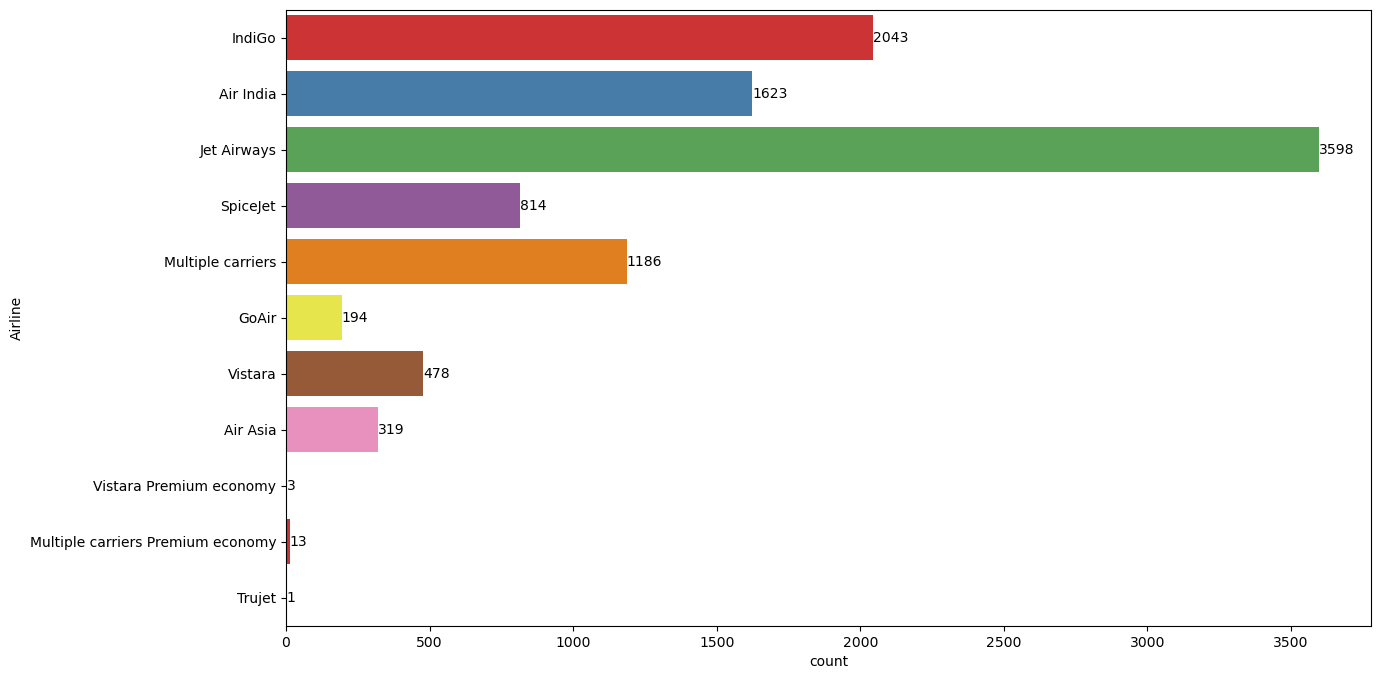

In [82]:
#plotting the Airline column to analyse the values distribution in it-

plt.figure (figsize=(14,8))

ax = sns.countplot(y = flight['Airline'],palette='Set1')
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The majority of passengers prefer Jet Airways, followed by IndiGo and Air India. This preference can be attributed to factors such as the airlines' reputation for service quality and reliability, extensive flight networks, competitive pricing and offers, loyalty programs, and corporate agreements. These factors influence passenger choices and contribute to the distribution of passengers among these airlines. However, individual preferences, travel requirements, and regional factors may also play a role in shaping passenger preferences.

In [27]:
# day column distinct values-

flight['day'].value_counts()

9     1359
6     1246
27    1080
21    1066
24    1015
1      981
15     961
12     940
3      817
18     807
Name: day, dtype: int64

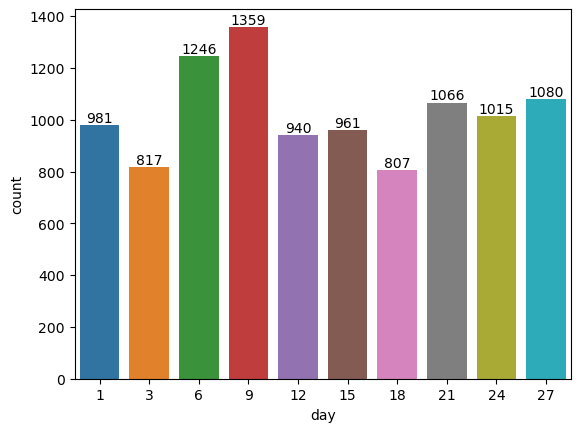

In [28]:
#plotting the day column to analyse the values distribution in it-

ax = sns.countplot(flight['day'])
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The figure shows that the average number of passengers per day is around 1000, and there doesn't appear to be a significant influence of the day of the week on passenger travel patterns. This could be due to various reasons, including consistent travel purposes throughout the week, regular commuting patterns, consistent flight schedules, destination factors, and other demographic or seasonal factors. While the specific data indicates a lack of variation based on the day of the week, it is important to consider that this conclusion is based on the available information and may not apply universally.

In [29]:
# month column distinct values-

flight['month'].value_counts()

5    3381
6    3301
3    2513
4    1077
Name: month, dtype: int64

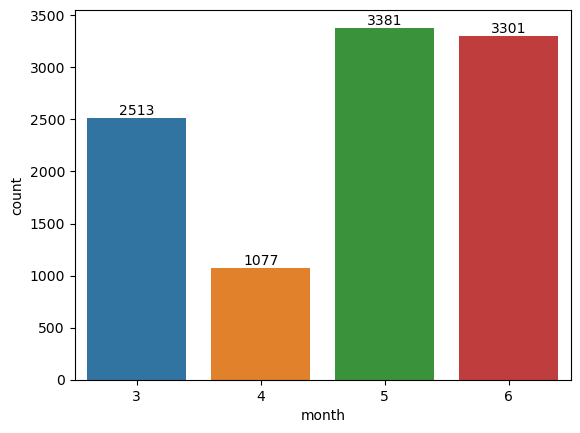

In [30]:
#plotting the month column to analyse the values distribution in it-

ax = sns.countplot(flight['month'])
ax.bar_label(ax.containers[0])
plt.show()

Infernce-

The figure shows that the majority of people traveled during the 5th month, followed by the 6th month and the 3rd month. The 5th month corresponds to May, which is typically the time for summer holidays for educational institutions. Many people choose to go on vacation during this period, leading to a higher number of passengers. The availability of free time, pleasant weather, and the desire to make the most of the summer break contribute to the popularity of traveling during this month. Therefore, the high number of passengers in the 5th month can be attributed to the summer holiday season.

In [31]:
# year column distinct values-

flight['year'].value_counts()

2019    10272
Name: year, dtype: int64

In [32]:
# source column distinct values-

flight['Source'].value_counts()

Delhi       4256
Kolkata     2849
Banglore    2098
Mumbai       688
Chennai      381
Name: Source, dtype: int64

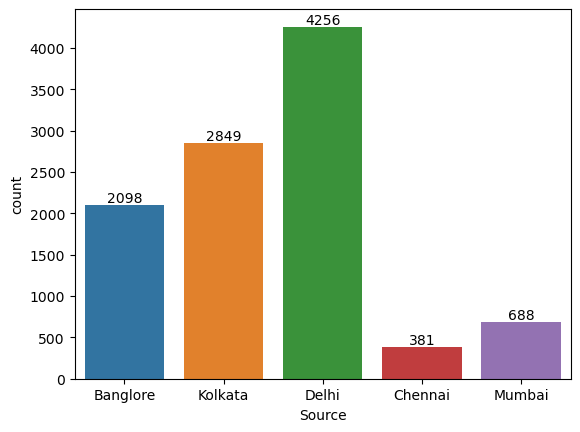

In [33]:
#plotting the source column to analyse the values distribution in it-

ax = sns.countplot(flight['Source'])
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The observation indicates that the majority of passengers are from Delhi, followed by Kolkata, Bangalore, and other cities. This can be attributed to the fact that these cities are well-developed and have a higher demand for air travel. People residing in these cities often seek to travel long distances within a shorter timeframe, which makes flights a preferred mode of transportation. Air travel offers convenience, saves time, and provides connectivity to various destinations. The developed infrastructure and accessibility of airports in these cities further contribute to the preference for flights. Therefore, the desire for efficient and time-saving travel options is a significant reason for the higher number of passengers from these developed cities.

In [34]:
# destination column  distinct values-

flight['Destination'].value_counts()

Cochin       4256
Banglore     2849
Delhi        1265
New Delhi     833
Hyderabad     688
Kolkata       381
Name: Destination, dtype: int64

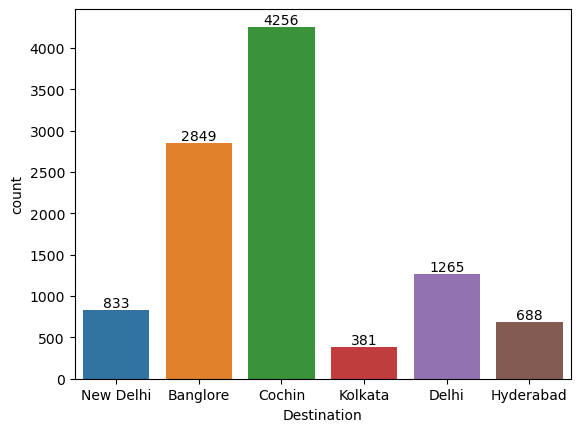

In [35]:
#plotting the Destination column to analyse the values distribution in it-

ax = sns.countplot(flight['Destination'])
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The figure indicates that the majority of passengers prefer traveling to destinations like Cochin, Bangalore, Delhi, and other major cities. Reasons for this preference include the prominence of these cities as business and economic centers, offering opportunities for work, education, and professional growth. Additionally, these cities attract tourists due to their cultural appeal and tourist attractions. The availability of transportation options and connectivity further contribute to their popularity. Personal reasons, such as visiting friends and relatives or attending family functions, may also influence the choice of these destinations. Collectively, these factors make Cochin, Bangalore, Delhi, and other major cities preferred travel destinations for the majority of passengers.

In [36]:
# total stops column distinct values-

flight['Total_Stops'].value_counts()

1 stop      5550
non-stop    3472
2 stops     1220
3 stops       29
4 stops        1
Name: Total_Stops, dtype: int64

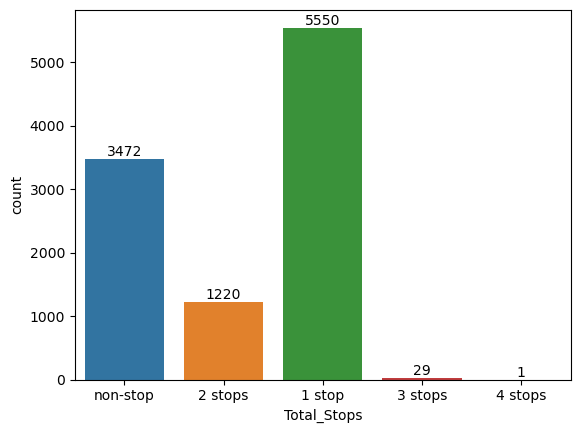

In [37]:
#plotting the total stops analyze values distribution in it-

ax = sns.countplot(flight['Total_Stops'])
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The figure indicates that the majority of passengers prefer nonstop or 1-stop flights. This preference can be attributed to the desire for time efficiency, convenience, comfort, connectivity, and flexibility in air travel. Nonstop and 1-stop flights offer shorter travel durations, eliminating the need for layovers and multiple transfers. They provide a more comfortable and convenient travel experience, with greater flexibility in scheduling. These flight options also ensure better connectivity to specific destinations and are available on popular routes. Overall, passengers prioritize the benefits of direct or limited-stop flights, emphasizing their preference for efficient and hassle-free travel.

In [38]:
# additional info column  distinct values-

flight['Additional_Info'].value_counts()

No info                         8023
In-flight meal not included     1912
No check-in baggage included     318
1 Long layover                     9
Change airports                    6
No Info                            3
Red-eye flight                     1
Name: Additional_Info, dtype: int64

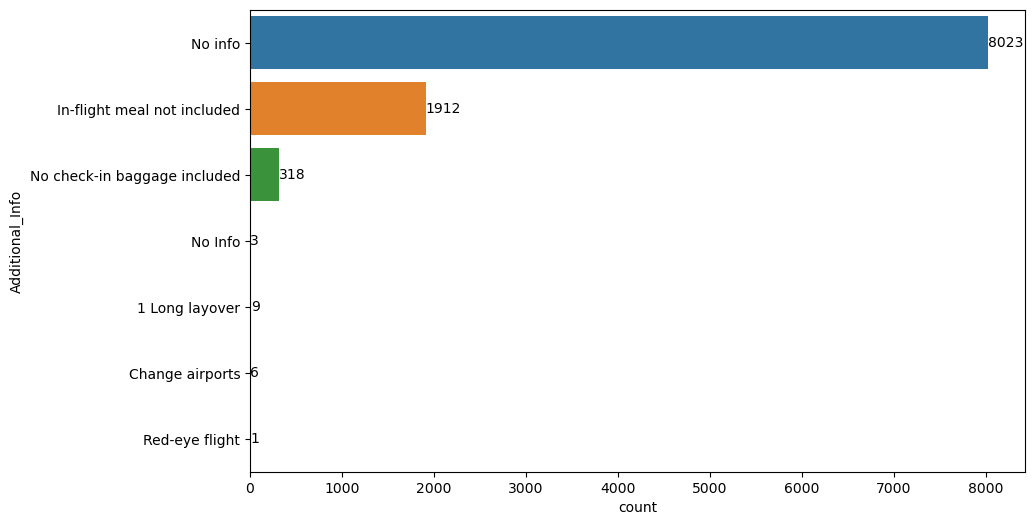

In [79]:
#plotting the additional info to analyse the values distribution in it-

plt.figure (figsize=(10,6))
ax = sns.countplot(y = 'Additional_Info',data=flight)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The figure indicates that there is a lack of additional information for approximately 8000 passengers. The reason for this could be various factors, including data collection limitations, incomplete records, or missing data points. It is important to ensure that data collection processes are comprehensive and accurate to capture information for all passengers. In this case, the absence of additional information for a significant number of passengers may limit the ability to analyze their characteristics or travel patterns.

In [40]:
# converting to datetime-

flight['dep_hour'] = pd.to_datetime(flight['Dep_Time']).dt.hour
flight['dep_min'] = pd.to_datetime(flight['Dep_Time']).dt.minute
flight.drop('Dep_Time',inplace=True,axis=1)

Inference-

we are extracting two seperate columns 

from departure time we are extracting hours and minutes using datetime function.  

In [41]:
# converting to datetime-

flight['Arrival_hour'] = pd.to_datetime(flight['Arrival_Time']).dt.hour
flight['Arrival_min'] = pd.to_datetime(flight['Arrival_Time']).dt.minute
flight.drop('Arrival_Time',inplace=True,axis=1)

Inference-

we are extracting two seperate columns

from arrival time we are extracting hours and minutes using datetime function.

In [42]:
# the dataset after adding new columns-

flight.head()

,Airline,Date_of_Journey,day,month,year,Source,Destination,Route,Duration_in_minutes,Total_Stops,Additional_Info,Price,Date_of_Journey,Duration,dep_hour,dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,24,3,2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24/03/2019,2h 50m,22,20,1,10
1,Air India,1/05/2019,1,5,2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1/05/2019,7h 25m,5,50,13,15
2,Jet Airways,9/06/2019,9,6,2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9/06/2019,19h,9,25,4,25
3,IndiGo,12/05/2019,12,5,2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12/05/2019,5h 25m,18,5,23,30
4,IndiGo,01/03/2019,1,3,2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,01/03/2019,4h 45m,16,50,21,35


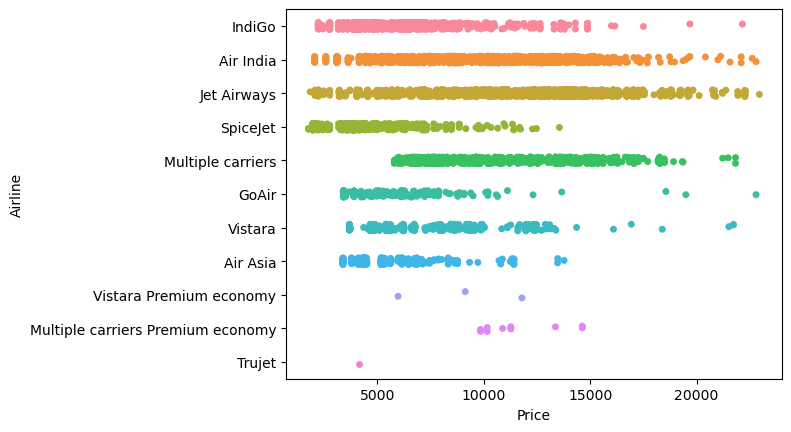

In [43]:
#plotting the airline column along price column to understand how airline affect our flight price-

sns.stripplot(x ='Price',y ='Airline',data=flight)
plt.show()           

Inference-

The figure indicates that the majority of passengers prefer flights within the price range of 5000 rupees to 20,000 rupees, regardless of the airline. This can be attributed to several factors, including affordability, competitive pricing, alignment with commonly traveled distances, market demand, and the satisfactory level of services offered within this price range. Passengers are likely to choose flights that fit within their budget while providing good value for money. Airlines adjust their pricing strategies to cater to this demand and maximize their customer base. Overall, the preference for flights within this price range reflects the balance between cost and services desired by passengers.


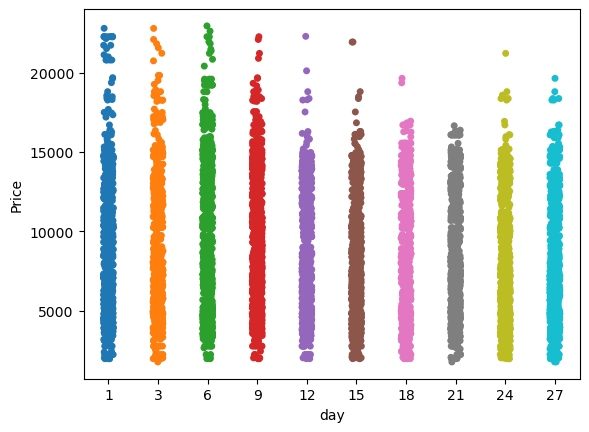

In [44]:
#plotting the day column along price column to understand how it affect our flight price-

sns.stripplot(x='day',y ='Price',data= flight)
plt.show()  

Inference-

The figure reveals that the day of the week does not significantly affect flight prices, as they are evenly distributed. However, there is a concentration of prices in the range of 15,000 to 20,000 rupees, representing the maximum price range. This can be attributed to factors such as demand and supply dynamics, pricing strategies, competition, and established pricing structures in the airline industry. Airlines may strive to offer competitive prices and maintain consistency across different days to attract customers. The observed price range may reflect the standard fare structure for the flights analyzed. Overall, the figure indicates that day of the week does not play a major role in determining flight prices, while the maximum price range is influenced by various market factors.

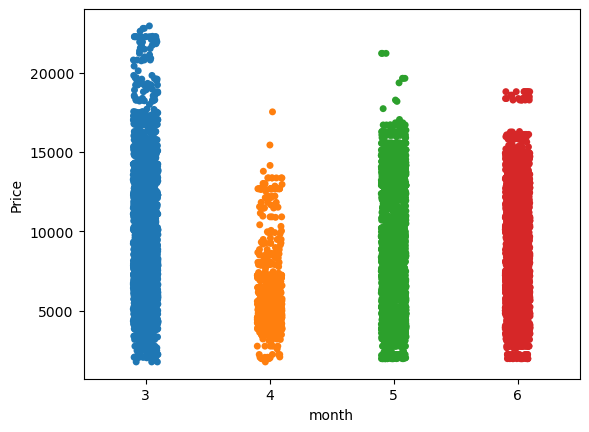

In [45]:
#plotting the month column along price column to understand how it affect our flight price-

sns.stripplot(x='month',y ='Price',data= flight)
plt.show()

Inference-

The figure demonstrates that flight prices remain relatively equal across different months, indicating that the month of travel does not have a significant influence on pricing. This can be attributed to consistent pricing strategies implemented by airlines, intense market competition, fluctuations in demand throughout the year, booking patterns of passengers, and general market factors that do not directly correlate with specific months. Overall, these factors contribute to the observed uniformity in flight prices, regardless of the month of travel.

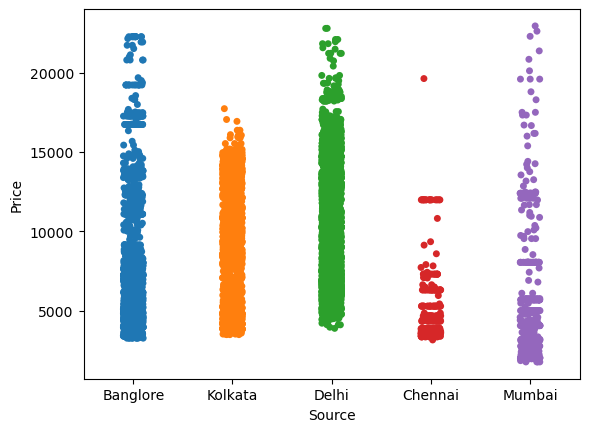

In [46]:
#plotting the source column along price column to understand how it affects our flight price-

sns.stripplot(x='Source',y ='Price',data= flight)
plt.show()

Inference-

Passengers traveling from major cities like Bangalore, Delhi, and Mumbai have paid significantly higher prices compared to others, as indicated by the figure. This can be attributed to several factors, including the higher market demand in these cities due to business activities and tourism, better flight connectivity and competition, longer distances or popular destinations covered by flights from major cities, higher operational costs and airport charges, and the supply and demand dynamics that can result in limited availability during peak travel periods. Collectively, these factors contribute to the observed disparity in flight prices based on the source location of passengers.

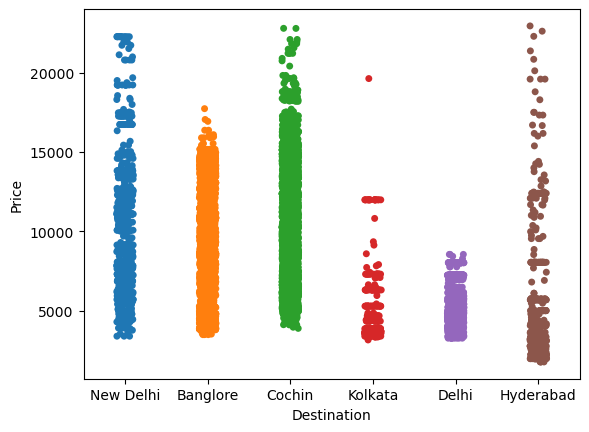

In [47]:
#plotting the destination column along price column to understand how it affects our flight price-

sns.stripplot(x='Destination',y ='Price',data= flight)
plt.show()

Inference-

The figure demonstrates that flight prices are influenced by the destination of travel. Developed cities such as Hyderabad, Bangalore, New Delhi, and Cochin have higher flight prices compared to other destinations. This can be attributed to factors such as increased market demand due to business opportunities and tourism, better flight connectivity and competition, higher operational costs and airport charges, seasonality effects during peak travel periods, and the economic strength of developed cities. Collectively, these factors contribute to the observed variation in flight prices based on the destination.

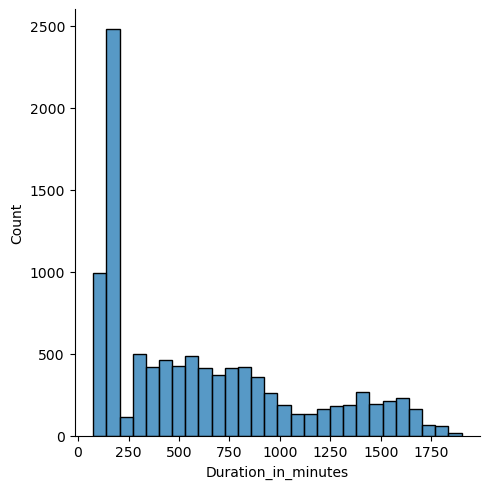

In [48]:
#plotting the Duration in minutes column to analyse the time distribution in it-

sns.displot(flight['Duration_in_minutes'])
plt.show()

Inference-

The figure suggests that around 2500 passengers have travel durations of less than 250 minutes or 4 hours and 10 minutes. This can be attributed to several factors, including the prevalence of short-haul flights covering shorter distances, the proximity of destinations chosen by passengers, the preferences of business travelers for quick and efficient travel, and the desire for convenience and time savings. Collectively, these factors contribute to the observed trend of a significant number of passengers opting for shorter travel durations.

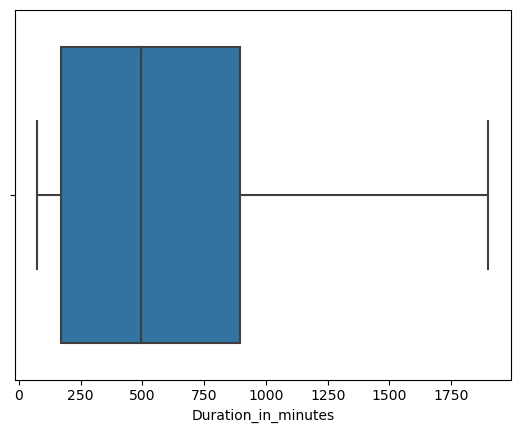

In [49]:
#plotting boxplot on  Duration inminutes column to understand where most of our data is-

sns.boxplot(flight['Duration_in_minutes'])
plt.show()

Inference-

The figure suggests that the majority of customers have travel durations between 200 to 900 minutes or 3 to 15 hours. This can be attributed to several factors, including the prevalence of medium-haul flights covering moderate distances, regional and international travel requirements, flight connectivity options within this duration range, economic considerations favoring longer flights, and time zone differences affecting travel durations. These factors collectively contribute to the observed trend of customers choosing travel durations within the mentioned range.

In [50]:
# binnig the duration column to making catogerical and understand it better-

flight['duration'] = pd.cut(flight['Duration_in_minutes'],bins=[0,500,1000,1500,2000],labels=['0-500','500-1000','1000-1500','1500-2000'])

In [51]:
flight.duration.value_counts()

0-500        5173
500-1000     2943
1000-1500    1408
1500-2000     748
Name: duration, dtype: int64

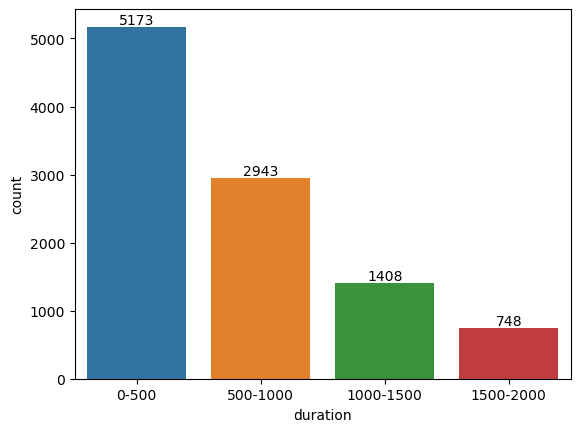

In [52]:
#plotting the duration column to analyse the values distribution in it-

ax = sns.countplot(flight['duration'])
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The figure indicates that passengers generally prefer shorter travel durations, as evidenced by a decrease in the number of passengers as the duration increases. This can be attributed to factors such as convenience, comfort, time constraints, availability of direct flights, and cost considerations. Passengers prioritize shorter travel times for reasons related to convenience, minimizing fatigue, meeting time-sensitive commitments, opting for direct flights, and potentially reducing costs. These factors collectively influence passenger preferences for shorter travel durations.

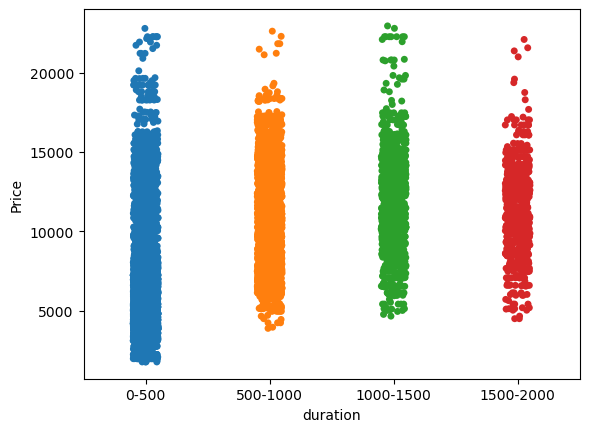

In [53]:
#plotting the duration column along price column to understand how it affects our flight price-

sns.stripplot(x='duration',y ='Price',data= flight)
plt.show()

Inference-

The figure shows that as the flight duration increases, there is a corresponding increase in the base flight price. This can be attributed to factors such as higher fuel consumption, reduced aircraft utilization, additional operational expenses, and the influence of demand and supply dynamics. Longer flights require more resources and incur higher costs for airlines, which are reflected in the pricing structure. Overall, the observed relationship between duration and price indicates that the duration of a flight does affect its price.

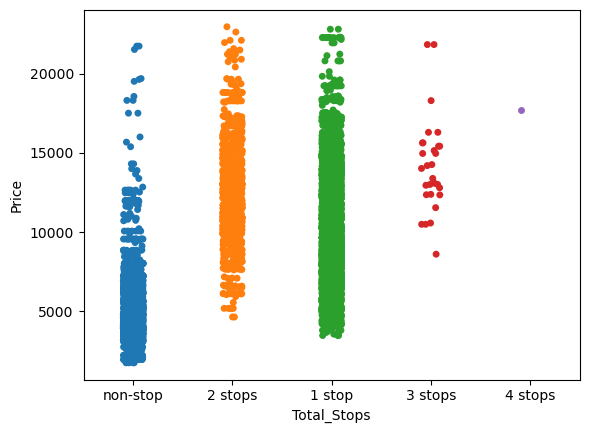

In [54]:
#plotting the total stops column along price column to understand how it affects our flight price-

sns.stripplot(x='Total_Stops',y ='Price',data= flight)
plt.show()

Inference-

The figure indicates that a majority of passengers have traveled nonstop, as evidenced by the fact that most of them had travel durations of less than 500 minutes. The presence of stops during a flight is typically associated with longer travel durations. When the duration of a flight increases, it may necessitate a stop or layover for refueling, crew changes, or passenger transfers. However, since the majority of passengers in the figure had shorter travel durations, it suggests that they opted for nonstop flights to reach their destinations more quickly and avoid the need for intermediate stops.

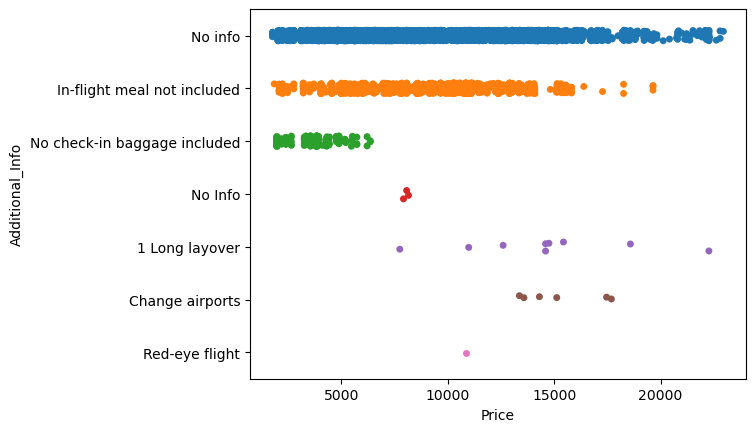

In [55]:
#plotting the additional column along price column to understand how it affects our flight price-

sns.stripplot(x='Price',y='Additional_Info',data= flight)
plt.show()

Inference-

The figure indicates that additional information does not have a significant impact on flight prices for a large percentage of passengers. This can be attributed to standardized pricing structures, limited variations in price based on additional information, market competition, and simplified pricing policies adopted by airlines. While there may be specific cases where additional details affect pricing, the overall observation suggests that additional information has minimal influence on flight prices for most passengers.

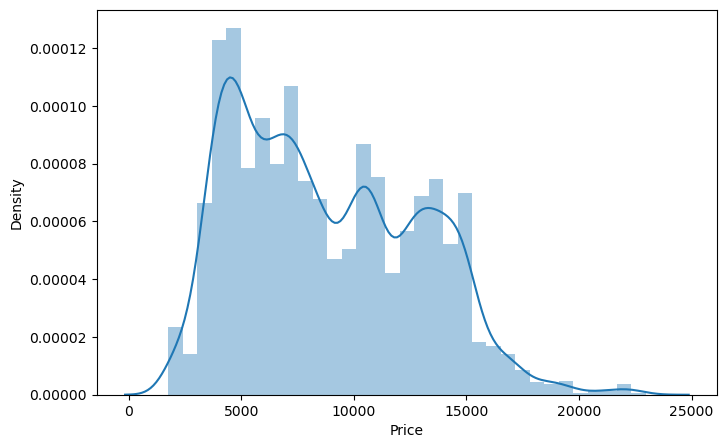

In [56]:
#plotting the price column to analyse the time distribution in it-

plt.figure (figsize=(8,5))

sns.distplot(flight['Price'])
plt.show()

Inference-

The figure displays a price range for flights from 2000 to 25000 rupees. This variation in price can be attributed to factors such as destination, flight class, seasonality, booking timing, and airline competition. Different destinations and flight classes may have varying costs, while seasonal demand and last-minute bookings can also influence prices. Additionally, competition among airlines contributes to the diverse pricing structure within the observed range. These factors collectively contribute to the range of flight prices observed in the figure.

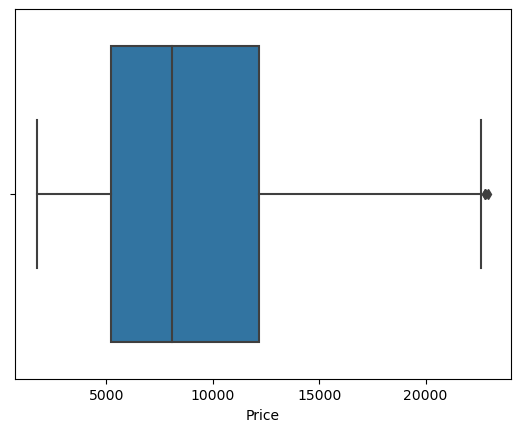

In [57]:
#plotting boxplot on price column to understand where most of our data is-

sns.boxplot(flight['Price'])
plt.show()

Inference-

The figure reveals that the majority of our passengers choose flights within the price range of 5000 to 12500 rupees. This range is favored for several reasons, including affordability, perceived value for money, market demand, and competition among airlines. Flights within this range provide a balance between cost and benefits, making them a popular choice among passengers. While individual preferences and external factors can influence travel decisions, the observed concentration of passengers in this price bracket highlights its appeal to a significant portion of our customer base.

### Conclusion-

Flight prices are influenced by several factors, as observed in the figures. Major conclusions can be drawn from the analysis. The price range for flights spans from 2000 to 25000 rupees, accommodating a wide range of budgets. Prices are impacted by the destination, with major cities like Bangalore, Delhi, and Mumbai generally having higher flight prices due to demand and operational costs. Flight class and services, seasonality, booking timing, and competition among airlines also contribute to price variations. Passengers can select flights within their preferred price range based on factors such as destination, timing, and flight class. These findings highlight the dynamic nature of flight pricing, reflecting market dynamics, customer preferences, and operational considerations.

In [58]:
# declaring y as target column-

y = flight.Price
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [59]:
# declaring a variable flight_1

flight_1 = flight[['day','month','dep_hour', 'dep_min','Arrival_hour', 'Arrival_min','Airline','Source','Destination','Duration_in_minutes', 'Total_Stops',]]

In [60]:
# declaring x as columns having direct or indirect relation with target-

x = flight_1.iloc[:,:]
x.head()

,day,month,dep_hour,dep_min,Arrival_hour,Arrival_min,Airline,Source,Destination,Duration_in_minutes,Total_Stops
0,24,3,22,20,1,10,IndiGo,Banglore,New Delhi,170,non-stop
1,1,5,5,50,13,15,Air India,Kolkata,Banglore,445,2 stops
2,9,6,9,25,4,25,Jet Airways,Delhi,Cochin,1140,2 stops
3,12,5,18,5,23,30,IndiGo,Kolkata,Banglore,325,1 stop
4,1,3,16,50,21,35,IndiGo,Banglore,New Delhi,285,1 stop


In [61]:
# creating dummy columns-

x = pd.get_dummies(x,columns=['Airline','Source','Destination','Total_Stops'])
x

,day,month,dep_hour,dep_min,Arrival_hour,Arrival_min,Duration_in_minutes,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,24,3,22,20,1,10,170,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,5,5,50,13,15,445,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,9,6,9,25,4,25,1140,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,12,5,18,5,23,30,325,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,3,16,50,21,35,285,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9,4,19,55,22,25,150,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10679,27,4,20,45,23,20,155,0,1,0,...,0,0,0,0,0,0,0,0,0,1
10680,27,4,8,20,11,20,180,0,0,0,...,0,1,0,0,0,0,0,0,0,1
10681,1,3,11,30,14,10,160,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [62]:
# importing train test split-

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
# importing standard scalar-

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[ 1.23846715, -1.49747512,  1.65860493, ..., -0.05320904,
        -0.00986719,  1.39947324],
       [-1.48938889,  0.23649675, -1.31478768, ..., -0.05320904,
        -0.00986719, -0.71455457],
       [-0.5405694 ,  1.10348268, -0.61516589, ..., -0.05320904,
        -0.00986719, -0.71455457],
       ...,
       [ 1.59427446, -0.63048919, -0.79007134, ..., -0.05320904,
        -0.00986719,  1.39947324],
       [-1.48938889, -1.49747512, -0.26535499, ..., -0.05320904,
        -0.00986719,  1.39947324],
       [-0.5405694 ,  0.23649675, -0.44026044, ..., -0.05320904,
        -0.00986719, -0.71455457]])

In [64]:
# importing the machine learning algorithms-

from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()

from sklearn.neighbors import KNeighborsRegressor
model_2 = KNeighborsRegressor()

from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor()

from sklearn.tree import DecisionTreeRegressor
model_4 = DecisionTreeRegressor()

from sklearn.svm import SVR
model_5 = SVR()

from sklearn.metrics import r2_score,mean_absolute_error

# Linear Regression

In [65]:
model_1.fit(x_train,y_train)

predict_1 = model_1.predict(x_test)

r2_score(y_test,predict_1)*100

ml = r2_score(y_test,predict_1)*100

print('Linear Regressor model  :' , ml)

Linear Regressor model  : 64.90924220993107


In [66]:
ms_1 = mean_absolute_error(y_test,predict_1)

print('mean absolute error of model_1 :' , ms_1)

mean absolute error of model_1 : 1815.0075989218274


#  KNeighbors Regressor

In [67]:
model_2.fit(x_train,y_train)

predict_2 = model_2.predict(x_test)

r2_score(y_test,predict_2)*100

ml_2 = r2_score(y_test,predict_2)*100

print('KNeighbors Regressor model  :' , ml_2)

KNeighbors Regressor model  : 62.80982742147585


In [68]:
ms_2 = mean_absolute_error(y_test,predict_2)

print('mean absolute error of model_2 :' , ms_2)

mean absolute error of model_2 : 1693.8804866180049


# RandomForest Regressor

In [69]:
model_3.fit(x_train,y_train)

predict_3 = model_3.predict(x_test)

r2_score(y_test,predict_3)*100

ml_3 = r2_score(y_test,predict_3)*100

print('RandomForest  Regressor model  :' , ml_3)

RandomForest  Regressor model  : 82.04999724285577


In [70]:
ms_3 = mean_absolute_error(y_test,predict_3)

print('mean absolute error of model_3 :' , ms_3)

mean absolute error of model_3 : 1116.390015598986


# DecisionTree Regressor

In [71]:
model_4.fit(x_train,y_train)

predict_4 = model_4.predict(x_test)

r2_score(y_test,predict_4)*100

ml_4 = r2_score(y_test,predict_4)*100

print('Decision Tree  Regressor model  :' , ml_4)

Decision Tree  Regressor model  : 72.77223607426804


In [72]:
ms_4 = mean_absolute_error(y_test,predict_4)

print('mean absolute error of model_4 :' , ms_4)

mean absolute error of model_4 : 1287.853284671533


# Support Vector Regressor

In [73]:
model_5.fit(x_train,y_train)

predict_5 = model_5.predict(x_test)

r2_score(y_test,predict_5)*100

ml_5 = r2_score(y_test,predict_5)*100

print('Support Vector  Regressor model  :' , ml_5)

Support Vector  Regressor model  : 20.560814286343877


In [74]:
ms_5 = mean_absolute_error(y_test,predict_5)

print('mean absolute error of model_4 :' , ms_5)

mean absolute error of model_4 : 2937.1783730991583


The mean absolute error is suppose to be 0 or the value nearest to 0 generally indicates better performance of a regression model, as it means the model is making fewer errors compared to other machine learning models.

the mean absolute error of model_3(Random Forest Regressor) is the lowest at 1116.

we consider Random Forest Regressor as best fit model.